<a href="https://colab.research.google.com/github/Jon123321s/-/blob/main/_krklaster_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Импорт необходимых библиотек




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:

# Загрузка данных из файла 'mall_customers_segmentation.csv'

data = pd.read_csv('Mall_Customers_Segmentation.csv')

print(data.head())# Вывод первых строк данных и общей информации о них
print(data.info())









# Построение матрицы рассеяния для выбранных признаков




print(data.isnull().sum())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Genre                  

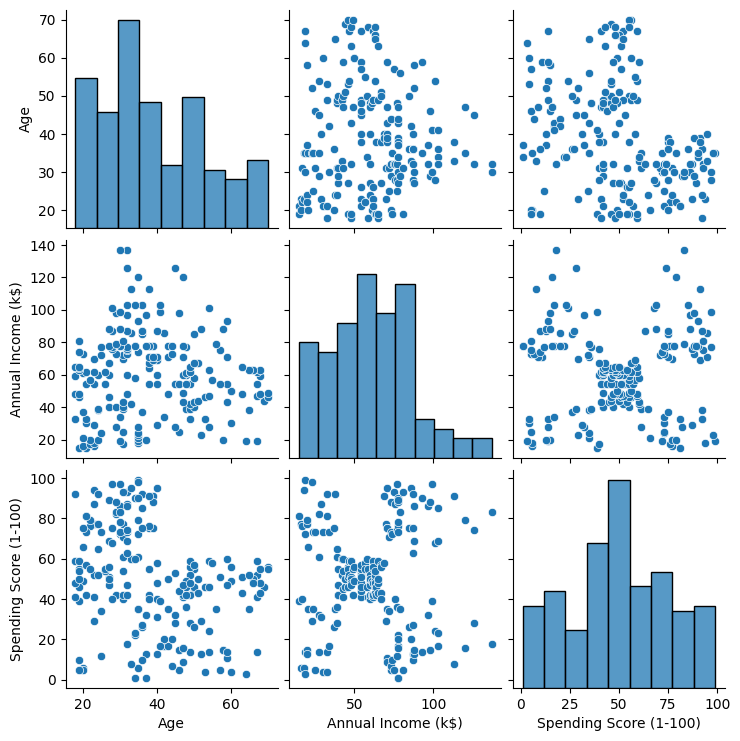

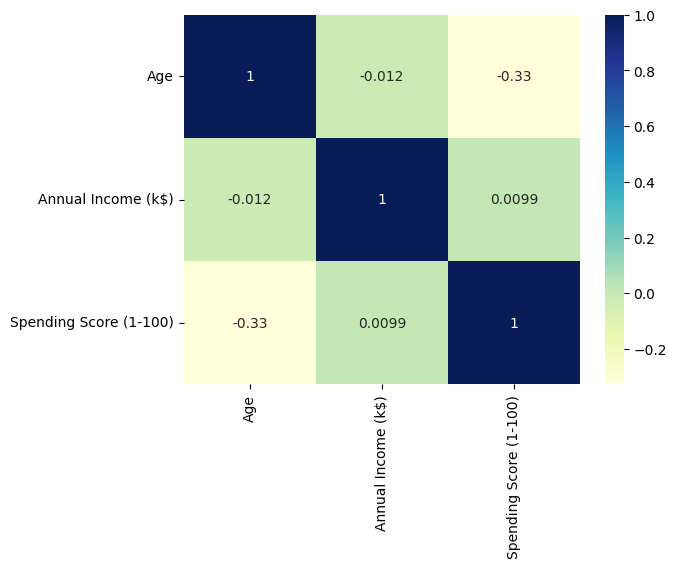

In [ ]:



# Построение матрицы рассеяния для выбранных признаков



sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Вычисление матрицы корреляции и построение ее тепловой карты





corr_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:

# Преобразование категориального признака 'genre' в числовой



data['Genre'] = data['Genre'].apply(lambda x: 1 if x == 'Male' else 0)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
print(data_scaled)

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-0.88640526 -1.13750203 -1.62449091  1.70038436]
 [ 1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-0.88640526 -0.6351352  -1.58632148  0.84631002]
 [ 1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-0.88640526 -1.06573534 -1.54815205  1.04041783]
 [ 1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [ 1.12815215 -1.20926872 -1.54815205  1.11806095]
 [-0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [ 1.12815215 -1.3528021  -1.50998262  0.61338066]
 [ 1.12815215  0.94373197 -1.43364376 -0.82301709]
 [-0.88640526 -0.27630176 -1.43

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

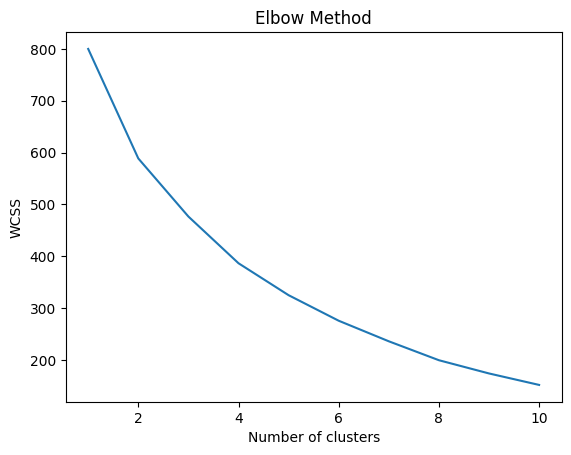

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 2 0 2 0 2 0 3 0 3 0 2 0 3 1 2 1 3 0 3 1 2 1 2 1 2 1 2 0 3 0 3 1 2 0 2
 0 2 0 2 1 3 0 2 0 2 0 0 2 2 1 0 3 2 3 2 3 0 3 3 1 2 2 3 1 2 2 1 0 3 2 2 2
 3 1 2 3 0 2 3 1 3 2 0 3 2 0 0 2 2 1 3 2 0 1 2 0 3 1 0 2 3 1 3 0 2 3 3 3 3
 0 2 1 0 0 2 2 2 2 1 2 0 1 0 0 3 1 3 1 4 1 0 0 4 0 4 1 4 0 4 1 0 0 4 1 3 0
 4 1 4 1 4 0 4 0 4 0 4 0 2 0 4 0 4 0 4 0 4 1 4 1 4 1 4 0 4 1 4 1 4 0 4 0 4
 1 4 1 4 0 4 0 4 0 4 0 4 1 4 1]


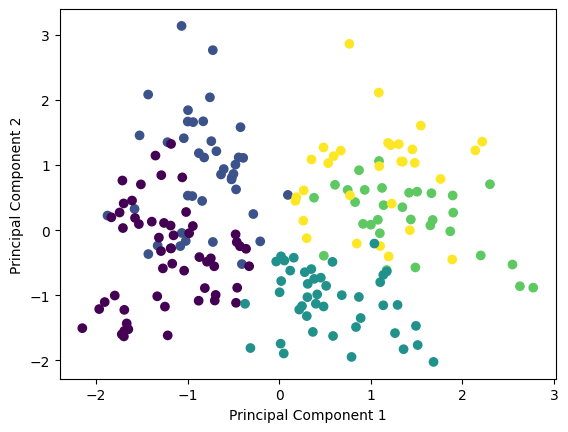

In [ ]:


# Определение оптимального количества кластеров по методу "локтя"



wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()





# Применение алгоритма KMeans для кластеризации данных



kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)
print(clusters)

# В итоге Этот код загружает данные о покупателях, проводит анализ данных, включая визуализацию и кластеризацию покупателей. Каждая строка кода подробно описана в комментариях.









# Применение метода главных компонент (PCA) для визуализации кластеров
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()